<p style="font-family: Arial; font-size:3em;color:black;"> Lab Exercise 11</p>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(5)  # creating pseudo-random numbers for reproducibility

In [30]:
# Let's consider the following A_orig matrix:

A_orig = np.array([[4, 2, 4, 5, 4, 2, 2], [4, 4, 3, 2, 2, 5, 4], [4, 1, 4, 7, 3, 6, 2], [8 ,1, 2, 0, 5, 0, 7], [4 , 5, 8, 7, 6, 2, 3]],dtype=float)
M, N = 5, 7
print (pd.DataFrame(A_orig).head())

     0    1    2    3    4    5    6
0  4.0  2.0  4.0  5.0  4.0  2.0  2.0
1  4.0  4.0  3.0  2.0  2.0  5.0  4.0
2  4.0  1.0  4.0  7.0  3.0  6.0  2.0
3  8.0  1.0  2.0  0.0  5.0  0.0  7.0
4  4.0  5.0  8.0  7.0  6.0  2.0  3.0


In [31]:
# Let's add some NaN(s) to  A_orig matrix

A = A_orig.copy()
A[3][1] = np.NaN
A[4][6] = np.NaN

A_df = pd.DataFrame(A)
print (A_df.head())

     0    1    2    3    4    5    6
0  4.0  2.0  4.0  5.0  4.0  2.0  2.0
1  4.0  4.0  3.0  2.0  2.0  5.0  4.0
2  4.0  1.0  4.0  7.0  3.0  6.0  2.0
3  8.0  NaN  2.0  0.0  5.0  0.0  7.0
4  4.0  5.0  8.0  7.0  6.0  2.0  NaN


In [32]:
# Fine tune K value such that the (average percentage) error for the 2 missing elements is minimum.
# Remember: this is an exercise where we have the actual values for missing elements. 
# In real-life scenarios missins elements are not known and you may need different metric(s)
# to assess the quality of your reconstructed matrix.
def finding_best_value_of_k(input):
    K = input
    P = np.abs(np.random.uniform(low=0, high=8, size=(M, K)))
    Q = np.abs(np.random.uniform(low=0, high=8, size=(K, N)))
    P = np.divide(P, K*P.max())
    Q = np.divide(Q, K*Q.max())
    return P, Q, K

In [33]:
def matrix_factorization(Rating_Matrix, P, Q, K, steps, alpha=0.001, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(len(Rating_Matrix)):
            for j in range(len(Rating_Matrix[i])):
                if ~np.isnan(Rating_Matrix[i][j]):
                    eij = Rating_Matrix[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eRating_Matrix = np.dot(P,Q)
        e = 0
        for i in range(len(Rating_Matrix)):
            for j in range(len(Rating_Matrix[i])):
                if ~np.isnan(Rating_Matrix[i][j]):
                    e = e + pow(Rating_Matrix[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        # print("Total error at step", step, "is", e)
        if e < 0.0001:
            break
    return P, Q.T

In [34]:
import math

ori_A31 = A_orig[3][1]
ori_A46 = A_orig[4][6]
err = [[],[]]
for temp_k in range(1, 20):
    # temp_error = 0
    P, Q, K = finding_best_value_of_k(temp_k)
    eP, eQ = matrix_factorization(A, P, Q.T, K, steps = 1000)
    eA = np.matmul(eP, eQ.T)
    eA31 = eA[3][1]
    eA46 = eA[4][6]
    # temp_error = math.sqrt(2**(eA31 - ori_A31) + 2**(eA46 - ori_A46))
    temp_error = ( (eA31 - ori_A31)/ori_A31 * 100 + (eA46 - ori_A46)/ori_A46 * 100 ) / 2 
    err[0].append(temp_k)
    err[1].append(temp_error)



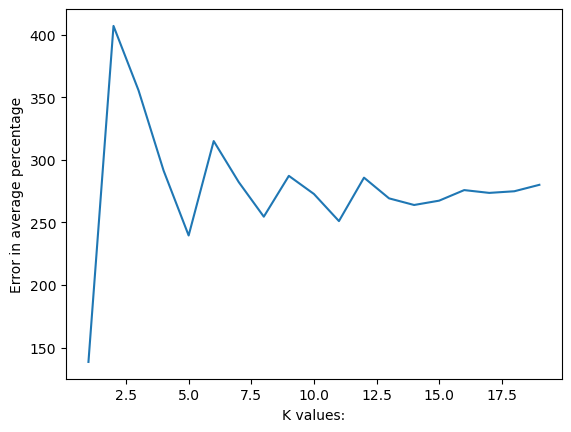

In [35]:
import matplotlib.pyplot as plt

plt.xlabel("K values:")
plt.ylabel("Error in average percentage")
plt.plot(err[0], err[1])

In [36]:
print(err[1])

[138.65346780335787, 406.933811389993, 355.44396922495685, 291.4079488419507, 239.61685167049552, 314.9872659259145, 282.223629724291, 254.62458759337167, 287.2219002469079, 272.76775453005405, 251.10073219319858, 285.78274892784293, 269.2516157220409, 263.9599380795864, 267.4168253766649, 275.8484133961184, 273.61475874967124, 274.9152326541558, 280.05993292976524]


After trying different value of K, we found we have the best result when K = 1. By observing the mean percentage error between the actual and predict value.